In [2]:
""" 1、定义一个计算欧式距离的函数，且命名为 distEclud()。
参数说明：vecA, vecB 分别表示两个相同维度的向量，输出结果为两个向量之间的欧氏距离。
2、np.sqrt(x)函数用来计算 x 的开方。
3 、 np.power(array,m): 表 示 对 array 中 的 每 个 元 素 求 它 的 m 次 方 , 譬
如:np.power([0,1,2,3],2)=[0,1,4,9]。
4 、 np.sum(array) 表 示 将 array 中 的 每 个 元 素 相 加 求 和 ， 譬 如 ：
np.sum([0,1,2])=3,np.sum([[0,1,2],[0,1,2]])=6。
5、np.array()函数用来创建一个数组，譬如:np.array([1,1])表示创建一个值为[1,1]的数组。
"""
import numpy as np
def distEclud(vecA, vecB): #定义一个欧式距离的函数
    #print(vecA-vecB)
    #print(np.power(vecA - vecB, 2))
    #print(np.sum(np.power(vecA - vecB, 2)))
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

In [3]:
#下面为计算[1,1]和[2,1]之间的欧式距离的一个例子
print('----test_distEclud-----')
vecA, vecB = np.array([1,1]),np.array([2,1])
print("vecA:",vecA)
print("vecB:",vecB)
distance = distEclud(vecA, vecB)
print(distance) # 1.0 计算两点之间的距离

----test_distEclud-----
vecA: [1 1]
vecB: [2 1]
1.0


In [10]:
"""
1、定义一个随机设置 k 个中心点的函数 randCent(dataSet, k)，其中参数 dataSet 为已给数据
集，
k 表示创建中心点的个数。返回值为所创建的 k 个中心点。
2、np.shape(a)：用来查看矩阵或者数组的维度。其中参数 a 为矩阵或者数组。
3、np.zeros([k, n])：用来创建一个 k 行 n 列的全 0 数组。
4、np.mat(a):用于将数组 a 转换为矩阵。
5、np.min(a):获取数组 a 中的最小值。
6、np.max(a):获取数组 a 中的最大值。
7、np.random.rand(a,b):产生一个 a 行 b 列的随机数组，数组中的每个元素为取值为[0,1]之
间的随机数。
"""

# 随机设置 k 个中心点：
# 可以将dataSet看作是坐标的列表
def randCent(dataSet, k): #第一个中心点初始化
    n = np.shape(dataSet)[1] #读取矩阵 dataSet 的第二维度的长度 有多少列
    print(n) # n=2
    centroids = np.mat(np.zeros([k, n])) #创建 k 行 n 列的全为 0 的矩阵
    for j in range(n): #(0,1)
        minj = np.min(dataSet[:,j]) #获得第 j 列的最小值
        # maxj = np.max(dataSet[:,j]) #后加的
        rangej = float(np.max(dataSet[:,j]) - minj) #得到最大值与最小值之间的范围
        centroids[:,j] = np.mat(minj + rangej * np.random.rand(k, 1)) #获得输出为 K 行 1列的数据，并且使其在数据集范围内
    return centroids

# 随机中心获取的例子
print('----test_randCent-----')
dataSet1 = np.array([[1,2],[3,6],[8,10],[12,23],[10,11],[13,18]])
print(dataSet1[1,:])
print(dataSet1)
r = randCent(dataSet1, 2)
print(r) # [[ 8.83544015 16.75467081] # [ 2.85688493 4.4799291 ]]

----test_randCent-----
[3 6]
[[ 1  2]
 [ 3  6]
 [ 8 10]
 [12 23]
 [10 11]
 [13 18]]
2
[[ 1.50990464 13.39316179]
 [12.96661647 18.99993113]]


In [5]:
from numpy import *
import time
import matplotlib.pyplot as plt

In [6]:
""" #注：因为采用了“from numpy import * ”语句引入 numpy 库中的函数，因此在用到
numpy 库中的函数时直接写函数名，前面不用加 numpy。
1、定义一个名为 euclDistance()的函数，用来计算两个矩阵之间的欧式距离。其中参数
vector1, vector2 分别表示两个矩阵。
2、np.sqrt(x)函数用来计算 x 的开方。
3 、 np.power(array,m): 表 示 对 array 中 的 每 个 元 素 求 它 的 m 次 方 , 譬
如:np.power([0,1,2,3],2)=[0,1,4,9]。
4 、 np.sum(array) 表 示 将 array 中 的 每 个 元 素 相 加 求 和 ， 譬 如 ：
np.sum([0,1,2])=3,np.sum([[0,1,2],[0,1,2]])=6。
"""
# calculate Euclidean distance
def euclDistance(vector1, vector2):
    return sqrt(sum(power(vector2 - vector1, 2))) #求这两个矩阵的距离，vector1、2 均为矩阵

In [7]:
""" 1、定义一个名为 initCentroids()的函数，用来在样本集中随机选取 k 个样本点作为初始
质心，
其中参数 dataSet 为已给数据集，k 表示创建中心点的个数。返回值为所创建的 k 个
中心点
2、np.zeros([k, n])：用来创建一个 k 行 n 列的全 0 数组。
3、np.random.uniform(a,b):返回区间[a,b)中的任意值。
""" 
# init centroids with random samples
#在样本集中随机选取 k 个样本点作为初始质心，抽取样本。
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape #矩阵的行数、列数 。
    centroids = zeros((k, dim)) # 创建一个 k 行 dim 列的全 0 数组。
    for i in range(k):
        index = int(random.uniform(0, numSamples)) #随机产生一个浮点数，然后将其转化为 int 型。
        centroids[i, :] = dataSet[index, :] # 将 dataSet 中 第 index+1 行 赋 值 给centroids 的第 i+1 行。
    return centroids

In [16]:
""" 1、定义一个名为 kmeans()的聚类算法，用于将 dataSet 矩阵中的样本分成 k 个类。其中
参数 dataSet 为一个矩阵，参数 k 表示将分为 k 类。
2、np.mat(a):用于将数组 a 转换为矩阵。
3、np.zeros([k, n])：用来创建一个 k 行 n 列的全 0 数组。
4、matrix.A:将矩阵类型转换为 array 类型。
5、np.nonzero(array):用于得到数组 array 中非零元素的位置（数组索引）,参数 array 为
一个数组。
6、np.mean()：求均值。经常操作的参数为 axis，以 m * n 矩阵举例：
axis 不设置值，对 m*n 个数求均值，返回一个实数；
axis = 0：压缩行，对各列求均值，返回 1* n 矩阵；
axis =1 ：压缩列，对各行求均值，返回 m *1 矩阵。
7、plt.plot(x,y,color,marksize):当使用此函数画一个数据点时，参数 x 表示横坐标,参数 y
表示纵坐标，参数 color 用来指定点的颜色，
参数 marksize 用来指示点的大小。
"""
# k-means cluster
#dataSet 为一个矩阵
#k 为将 dataSet 矩阵中的样本分成 k 个类
def kmeans(dataSet, k):
    numSamples = dataSet.shape[0] #读取矩阵 dataSet 的第一维度的长度,即获得有多少个样本数据
    clusterAssment = mat(zeros((numSamples, 2))) 
    #得到一个 N*2 的零矩阵,建立簇分配结果矩阵，第一列存类别，第二列存误差。
    clusterChanged = True #用来判断样本聚类结果是否变化的变量。
    ## step 1: init centroids
    centroids = initCentroids(dataSet, k) #在样本集中随机选取 k 个样本点作为初始质心
    while clusterChanged:
        clusterChanged = False
        ## for each sample
        for i in range(numSamples): #range
            minDist = 100000.0 #创建的一个临时变量，用来储存某个样本到所有聚类中心的最小距离。
            minIndex = 0 #创建的一个临时变量，用来储存和某个样本距离最近的聚类中心的类别作为该样本的类别。
            ## for each centroid
            ## step 2: find the centroid who is closest
            #计算每个样本点与质点之间的距离，将其归内到距离最小的那一簇
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :]) #计算每个样本到每个聚类中心之间的距离。
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            ## step 3: update its cluster
            #k 个簇里面与第 i 个样本距离最小的的标号和距离保存在 clusterAssment中
            #若所有的样本所属类别不在变化，则退出 while 循环
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist**2 #两个**表示的是 minDist的平方
        ## step 4: update centroids
        for j in range(k):
            #clusterAssment[:,0].A==j 是找出矩阵 clusterAssment 中第一列元素中等于j 的行的下标，
            #返回的是一个以 array 的列表，第一个 array 为等于 j 的下标
            #将 dataSet矩阵中相对应的样本提取出来
            #print("clusterAssment[:, 0].A",nonzero(clusterAssment[:, 0].A==j))
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]] 
            #计算标注为 j 的所有样本的平均值
            centroids[j, :] = mean(pointsInCluster, axis = 0) 
    print ('Congratulations, cluster complete!')
    return centroids, clusterAssment #
# show your cluster only available with 2-D data
#centroids 为 k 个类别，其中保存着每个类别的质心
#clusterAssment 为样本的标记，第一列为此样本的类别号，第二列为到此类别质心的距离
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print ("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr'] #样本颜色
    if k > len(mark):
        print ("Sorry! Your k is too large! please contact wojiushimogui")
        return 1
    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0]) #为样本指定颜色
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex]) #画出样本
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb'] #中心的颜色
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12) #画出中心点
    plt.show() #显示图片


step 1: load data...
step 2: clustering...
clusterAssment[:, 0].A (array([ 1,  3,  5,  7,  9, 11, 19, 23, 27, 29, 31, 33, 35, 39, 45, 47, 51,
       53, 55, 59, 63, 67, 71, 75, 77, 79], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64))
clusterAssment[:, 0].A (array([ 6, 14, 15, 30, 43], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))
clusterAssment[:, 0].A (array([ 0,  4,  8, 12, 13, 16, 17, 20, 21, 24, 25, 28, 32, 36, 37, 40, 41,
       44, 48, 49, 52, 56, 57, 60, 61, 64, 65, 68, 69, 72, 73, 76],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
clusterAssment[:, 0].A (array([ 2, 10, 18, 22, 26, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
clusterAssment[:, 0].A (array([ 3,  5,  7, 11, 19, 23, 27, 29, 31, 33, 39, 47, 51, 53

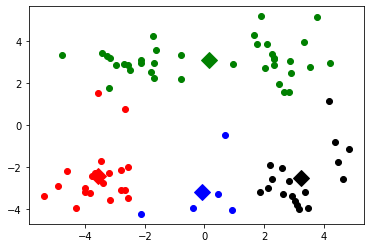

In [17]:
"""
1、".txt"文件的读取：
f=open(file_path) #其中 f 叫做文件句柄，file_path 为文件所在的路径。
f.readlines()函数用来读取文件中的全部内容，返回值为一个列表，列表中的每个元
素为每行对应的内容。
f.close()用来关闭所打开的文件。
2、.strip()方法用于移除字符串头尾指定的字符（默认为空格或换行符）。
3、.split(str)方法通过指定分隔符对字符串进行切片，其中参数 str 为分隔符，返回值为
一个列表。
4、.append(obj)方法用于在列表末尾添加 obj。
5、float(a)表示将 a 转化为 float 类型。
"""
## step 1: 载入待聚类数据
print ("step 1: load data..." )
dataSet = [] #列表，用来表示，列表中的每个元素也是一个二维的列表；这个二维列表就是一个样本，样本中包含有我们的属性值和类别号。
#与我们所熟悉的矩阵类似，最终我们将获得 N*2 的矩阵，每行元素构成了我们的训练样本的属性值和类别号
fileIn = open("testdata.txt") #"D:/testdata.txt"为数据文件所在位置的绝对路径。
for line in fileIn.readlines(): #依次遍历每一行
    temp=[] #定义一个缓存列表
    lineArr = line.strip().split('\t') #line.strip()把末尾的'\n'去掉，.split('\t')表示以'\t'为分隔符将字符串切片。
    temp.append(float(lineArr[0])) #float(a)表示将 a 转化为 float 类型。
    temp.append(float(lineArr[1]))
    dataSet.append(temp) #向 dataSet 列表中添加元素。
fileIn.close() #关闭刚刚打开的 testdata.txt 文件。
## step 2: 聚类中... 
print ("step 2: clustering..." )
dataSet = mat(dataSet) #mat()函数是 Numpy 中的库函数，将数组转化为矩阵
k = 4
centroids, clusterAssment = kmeans(dataSet, k) #调用 KMeans 文件中定义的 kmeans 方法

## step 3: 画图展示结果
print ("step 3: show the result..." )
showCluster(dataSet, k, centroids, clusterAssment)